### 과제1
비지도 학습의 목적인 Grouping에 대해 자세히 설명해 주세요! Dataset을 Grouping한다는 것이 무슨 의미인지 간단히 서술해 주시고,

세션에서 언급되었던 Grouping을 위한 두 수단에 대해서 예시 모델을 제시하여 설명해 주시면 됩니다! 예시 모델의 종류에 대해서는 구글링을 통해 조사할 수 있겠습니다.

- Grouping: 비지도 학습은 정답지가 없기 때문에, 비슷한 특성을 가진 데이터끼리 grouping하는 방법을 수행한다. 이 방법을 통해서 데이터 내의 구조를 파악할 수 있고, 비슷한 특성을 가진 데이터를 파악할 수 있다. 대표적으로는 Clustering 기법이 있는데, 데이터의 특징들을 통해 데이터 집합 생성하는 것이다. k-means clustering, hierarchical clustering과 같은 여러 종류의 클러스터링 기법이 존재한다.K-means clustering은 데이터를 K개의 클러스터로 그룹화하는 알고리즘으로, 각 클러스터의 중심과 데이터 포인트 간의 거리를 최소화하면서 클러스터를 형성한다. hierarchical clustering은 데이터를 계층적 트리 구조로 그룹화하는 알고리즘으로, 유사한 데이터가 서로 가까이 위치하도록 클러스터를 형성한다. 클러스터링을 수행하는 과정에서는 Dimensionality Reduction과 같은 기법으로 크기 축소를 통해 모델 성능 향상에 기여할 수 있다.

### 과제2
드라이브에 첨부된 diabetes.csv 파일을 이용해, decision tree를 이용한 classifier model을 디자인해 주세요!

분류 문제에 맞는 (간단한 수준의) 데이터 전처리 및 Feature selection이 선행되어야 합니다.

모델의 성능은 상관 없지만, 모델 구동 결과 및 평가지표의 출력은 정상적으로 이루어져야 합니다! 평가지표의 종류 또한 상관 없습니다.

데이터셋에 대한 설명은 아래 캐클 링크를 참조해 주세요!
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

과제 진행에 있어 어려움을 겪으신다면 아래 링크의 내용을 참조하시면 됩니다!
https://www.datacamp.com/tutorial/decision-tree-classification-python


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ybigta/과제/0118/실습 및 과제 데이터셋/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

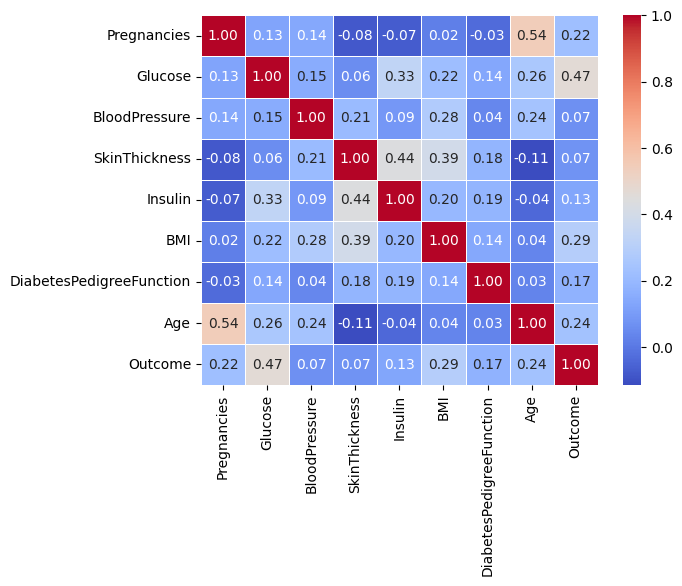

In [8]:
sns.heatmap(df.corr(), annot =True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()
# 변수간 상관관계가 크지 않음.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(['Outcome'], axis=1)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# 10보다 큰 수가 있지만, 무조건 제거하면 좋지 않음. 중요한 변수는 살려두는 것이 바람직하다.

                   Variable        VIF
0               Pregnancies   3.275748
1                   Glucose  16.725078
2             BloodPressure  14.619512
3             SkinThickness   4.008696
4                   Insulin   2.063689
5                       BMI  18.408884
6  DiabetesPedigreeFunction   3.195626
7                       Age  13.492985


In [12]:
from sklearn.ensemble import RandomForestRegressor
X = df.drop(['Outcome'], axis=1)
y = df.iloc[:, :-1]
model = RandomForestRegressor()
model.fit(X, y)
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# 변수 중요도 파악
# VIF와 변수 중요도에서 가장 영향을 미치지 못하는 변수: BMI > Age, 나머지...
# 따라서 이 변수들을 차례대로 VIF에서 제거하면서 적절한 VIF 값이 나오는 조합을 찾아보자.

                    Feature  Importance
4                   Insulin    0.892179
1                   Glucose    0.057382
2             BloodPressure    0.023153
3             SkinThickness    0.011642
7                       Age    0.007101
5                       BMI    0.004437
6  DiabetesPedigreeFunction    0.002092
0               Pregnancies    0.002013


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(['Outcome', 'BMI', 'Age', 'BloodPressure'], axis=1)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# 'BMI', 'Age'을 제거하면 10 근처로 VIF가 낮아져서 다중공선성을 어느정도 해결할 수 있었다.
# 추가적으로 BloodPressure의 경우 outcome과의 상관관계가 매우 낮기 때문에 제거하였다.
# 최종적으로 아래와 같은 결과를 얻을 수 있었고, 변수 선택을 아래와 같이 진행하기로 하였다.

                   Variable       VIF
0               Pregnancies  2.329116
1                   Glucose  5.438283
2             SkinThickness  3.033056
3                   Insulin  1.944740
4  DiabetesPedigreeFunction  3.090999


In [20]:
df1 = df.drop(['BMI', 'Age', 'BloodPressure'], axis=1)
df1.head()

,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
0,6,148,35,0,0.627,1
1,1,85,29,0,0.351,0
2,8,183,0,0,0.672,1
3,1,89,23,94,0.167,0
4,0,137,35,168,2.288,1


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [21]:
# Model build
dt_clf = DecisionTreeClassifier(random_state=42)

# Train/test split 진행 (7:3)
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Outcome',axis=1),
                                                    df1['Outcome'],
                                                    test_size=0.3, random_state=42)
# 모델 훈련
dt_clf = dt_clf.fit(X_train,y_train)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = dt_clf.predict(X_test)

# 1. accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 2. 정밀도, 재현율, F1 score
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.6710
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       151
           1       0.52      0.54      0.53        80

    accuracy                           0.67       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231

